<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/5_Kinds_of_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy.core.multiarray import asarray
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir

In [ ]:
folder = '/content/drive/MyDrive/BAOCAOAI/Flower/Flower_Train/'
photos, labels = list(), list()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('dandelion'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sunflower'):
    output = 4.0 
  if file.startswith('tulip'):
    output = 5.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

save('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerphoto.npy', photos)
save('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerlabels.npy', labels)

photos = np.load('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerphoto.npy')
labels = np.load('/content/drive/MyDrive/BAOCAOAI/Flower/afterpreprocessingdata/flowerlabels.npy')

x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=6)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6, activation='softmax'))

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

(4103, 50, 50, 3) (4103,)
Epoch 1/10
69/69 [==============================] - 30s 428ms/step - loss: 1.3070 - accuracy: 0.4426
Epoch 2/10
69/69 [==============================] - 29s 419ms/step - loss: 1.0456 - accuracy: 0.5818
Epoch 3/10
69/69 [==============================] - 29s 417ms/step - loss: 0.9156 - accuracy: 0.6371
Epoch 4/10
69/69 [==============================] - 32s 468ms/step - loss: 0.7908 - accuracy: 0.6888
Epoch 5/10
69/69 [==============================] - 29s 418ms/step - loss: 0.7088 - accuracy: 0.7300
Epoch 6/10
69/69 [==============================] - 29s 419ms/step - loss: 0.6060 - accuracy: 0.7629
Epoch 7/10
69/69 [==============================] - 30s 433ms/step - loss: 0.5139 - accuracy: 0.8075
Epoch 8/10
69/69 [==============================] - 29s 419ms/step - loss: 0.4555 - accuracy: 0.8335
Epoch 9/10
69/69 [==============================] - 29s 417ms/step - loss: 0.3221 - accuracy: 0.8940
Epoch 10/10
69/69 [==============================] - 31s 449ms/st

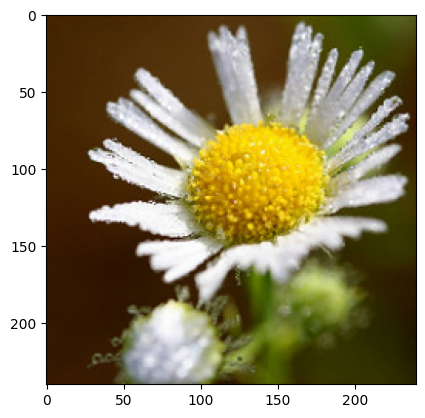

1/1 [==============================] - 0s 123ms/step
1
Hoa:  Daisy


In [ ]:

img = Image.open('/content/drive/MyDrive/BAOCAOAI/Flower/Flower_Test/daisy (154).jpg')

IMG = img
img = img.resize((50, 50))

img = np.asarray(img)
img = img.reshape(1,50,50,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Daisy","Dandelion","Rose","Sunflower","Tulip"]
temp1 = matrix[0]
print(temp1)
print("Hoa: ", class_names[temp1])


In [ ]:
model.save('/content/drive/MyDrive/BAOCAOAI/Flower/Model/5_kinds_of_flowers.h5')